In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow import keras
from tensorflow.keras import layers

colors = ["#9DAFB0", "#75E6DA", '#189AB4', '#05445E', '#4D707E', '#56B66B']




In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.drop(['id'], axis=1, inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
feature_num = ['age', 'avg_glucose_level', 'bmi']
feature_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label = ['stroke']

In [5]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


<ipython-input-6-be08a782a5df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='stroke', ax=ax, palette=colors[2:4])


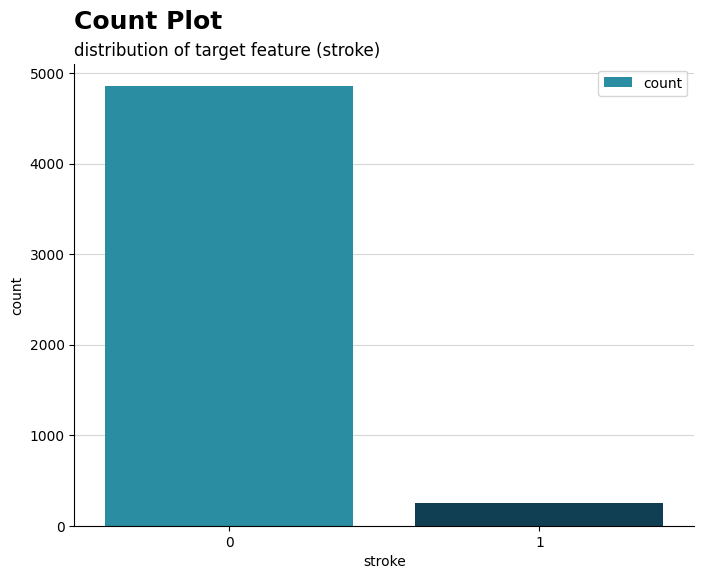

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=data, x='stroke', ax=ax, palette=colors[2:4])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_axisbelow(True)


plt.legend(['count'])
plt.grid(axis='y', alpha=0.5)
plt.suptitle("Count Plot", ha='left', x=0.125, y=0.97, fontsize=18, fontweight='bold')
plt.title("distribution of target feature (stroke)", loc='left')
plt.show()

In [7]:
#ns pq isto aqui está
data = data[data.gender != 'Other']

<ipython-input-8-eb818889da6e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature_num[i], ax=ax[0, i], shade=True, color=colors[2])
<ipython-input-8-eb818889da6e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature_num[i], ax=ax[0, i], shade=True, color=colors[2])
<ipython-input-8-eb818889da6e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature_num[i], ax=ax[0, i], shade=True, color=colors[2])


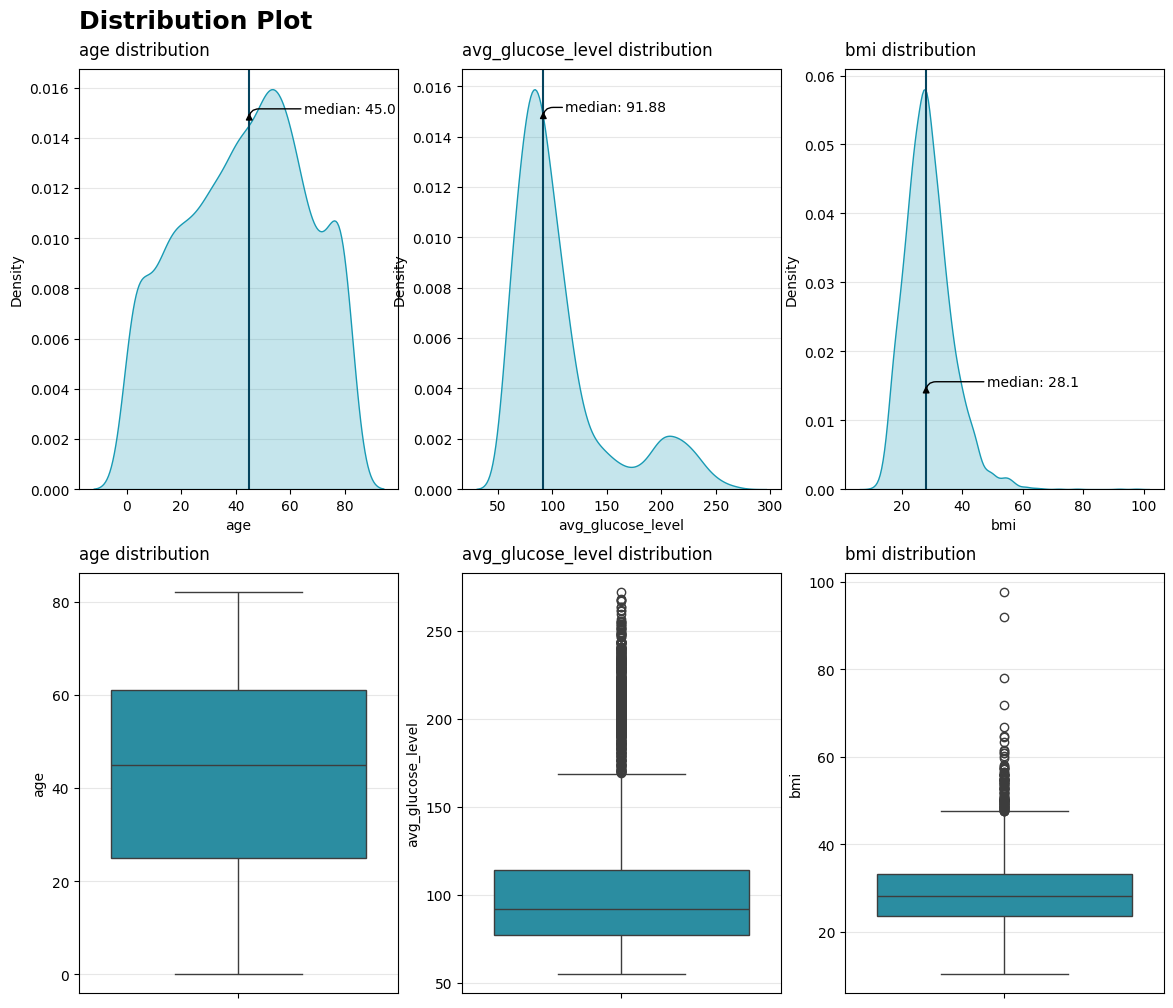

In [8]:
df = data[feature_num]

fig, ax = plt.subplots(2, 3, figsize=(14, 12))

for i in range(3) :
    median = df.median()[feature_num[i]]
    sns.kdeplot(data=df, x=feature_num[i], ax=ax[0, i], shade=True, color=colors[2])
    ax[0, i].axvline(x=median, color='#05445E')

    ax[0, i].set_title(f'{feature_num[i]} distribution', loc='left', pad=10)
    ax[0, i].grid(axis='y', alpha=0.3)
    ax[0, i].annotate(
        f'median: {median}',
        xy=(median, 0.015),
        xytext=(median+20, 0.015),
        arrowprops=dict(arrowstyle='-|>',
        fc='black', shrinkA=0, shrinkB=0,
        connectionstyle='angle,angleA=0,angleB=90,rad=10')
    )

    ax[0, i].set_axisbelow(True)


for i in range(3) :
    median = df.median()[feature_num[i]]
    sns.boxplot(data=df, y=feature_num[i], ax=ax[1, i], color=colors[2])
    ax[1, i].set_title(f'{feature_num[i]} distribution', loc='left', pad=10)
    ax[1, i].grid(axis='y', alpha=0.3)
    ax[1, i].set_axisbelow(True)

plt.suptitle("Distribution Plot", ha='left', x=0.125, y=0.93, fontsize=18, fontweight='bold')
plt.show()

<ipython-input-9-fa4395e56dcd>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1, x=feature_num[i], ax=ax[i], shade=True, color=colors[2])
<ipython-input-9-fa4395e56dcd>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df0, x=feature_num[i], ax=ax[i], shade=True, color=colors[5])
<ipython-input-9-fa4395e56dcd>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1, x=feature_num[i], ax=ax[i], shade=True, color=colors[2])
<ipython-input-9-fa4395e56dcd>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code

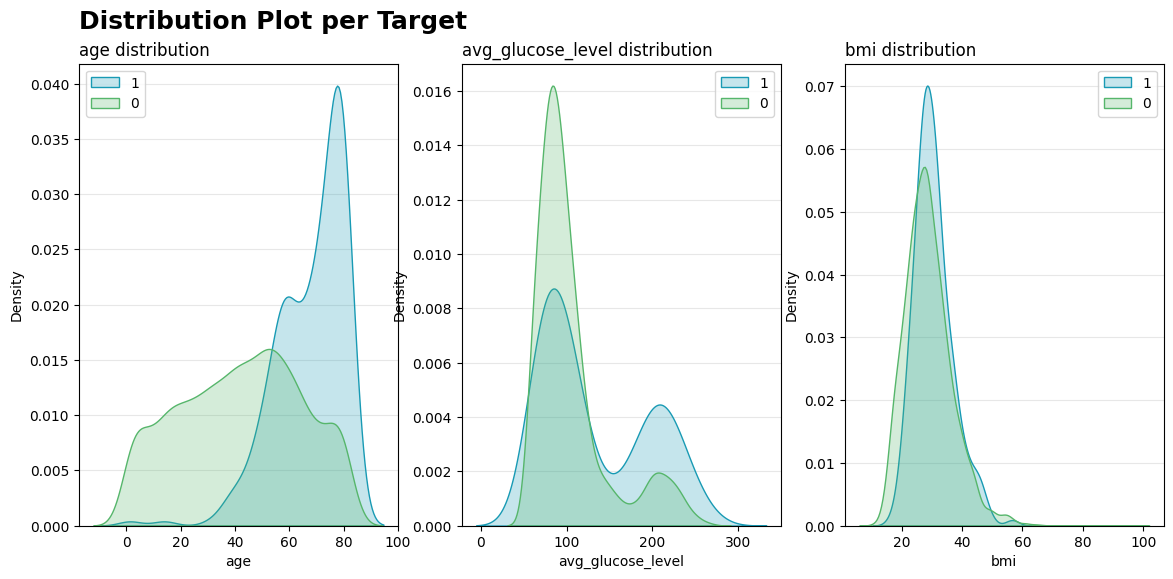

In [9]:
df1 = data[data.stroke == 1]
df0 = data[data.stroke == 0]


fig, ax = plt.subplots(1, 3, figsize=(14, 6))
for i in range(3) :
    sns.kdeplot(data=df1, x=feature_num[i], ax=ax[i], shade=True, color=colors[2])
    sns.kdeplot(data=df0, x=feature_num[i], ax=ax[i], shade=True, color=colors[5])

    ax[i].set_title(f'{feature_num[i]} distribution', loc='left')
    ax[i].legend(['1', '0'])
    ax[i].grid(axis='y', alpha=0.3)
    ax[i].set_axisbelow(True)

plt.suptitle("Distribution Plot per Target", ha='left', x=0.125, y=0.97, fontsize=18, fontweight='bold')
plt.show()

In [10]:
# Turning categorical variables into numbers to make it easier to analyze and model the data, since most machine learning algorithms work better with numerical inputs:
cols_yes_no_values = ['hypertension', 'heart_disease','stroke']

yes__no_values = {'0':0, '1':1}
for i in range(0, len(cols_yes_no_values)):
    data[cols_yes_no_values[i]] = data[cols_yes_no_values[i]].replace(yes__no_values)

# gender
gender = {'Female':0, 'Male':1, 'Other':2}
data['gender'] = data['gender'].replace(gender)

# age
age= {
    '0-1': 0, '1.1-2': 1, '2.1-3': 2, '3.1-4': 3, '4.1-5': 4, '5.1-6': 5, '6.1-7': 6,
    '7.1-8': 7, '8.1-9': 8, '9.1-10': 9, '10.1-11': 10, '11.1-12': 11, '12.1-13': 12,
    '13.1-14': 13, '14.1-15': 14, '15.1-16': 15, '16.1-17': 16, '17.1-18': 17,
    '18.1-19': 18, '19.1-20': 19, '20.1-21': 20, '21.1-22': 21, '22.1-23': 22,
    '23.1-24': 23, '24.1-25': 24, '25.1-26': 25, '26.1-27': 26, '27.1-28': 27,
    '28.1-29': 28, '29.1-30': 29, '30.1-31': 30, '31.1-32': 31, '32.1-33': 32,
    '33.1-34': 33, '34.1-35': 34, '35.1-36': 35, '36.1-37': 36, '37.1-38': 37,
    '38.1-39': 38, '39.1-40': 39, '40.1-41': 40, '41.1-42': 41, '42.1-43': 42,
    '43.1-44': 43, '44.1-45': 44, '45.1-46': 45, '46.1-47': 46, '47.1-48': 47,
    '48.1-49': 48, '49.1-50': 49, '50.1-51': 50, '51.1-52': 51, '52.1-53': 52,
    '53.1-54': 53, '54.1-55': 54, '55.1-56': 55, '56.1-57': 56, '57.1-58': 57,
    '58.1-59': 58, '59.1-60': 59, '60.1-61': 60, '61.1-62': 61, '62.1-63': 62,
    '63.1-64': 63, '64.1-65': 64, '65.1-66': 65, '66.1-67': 66, '67.1-68': 67,
    '68.1-69': 68, '69.1-70': 69, '70.1-71': 70, '71.1-72': 71, '72.1-73': 72,
    '73.1-74': 73, '74.1-75': 74, '75.1-76': 75, '76.1-77': 76, '77.1-78': 77,
    '78.1-79': 78, '79.1-80': 79, '80.1-81': 80, '81.1-82': 81
}
data['age'] = data['age'].replace(age)

# avg_glucose_level
avg_glucose_level= {'55-60':0, '60-65':1, '66-70':2, '71-75':3, '76-80':4, '81-85':5, '86-90':6, '91-95':7,
                    '96-100':8,'101-105':9, '106-110':10, '111-115':11, '116-120':12,'121-125':13,
                    '126-130':14, '131-135':15, '136-140':16,'141-145':17, '146-150':18, '151-155':19,
                    '156-160':20,'161-165':21, '166-170':22, '171-175':23, '176-180':24,'181-185':25,
                    '186-190':26, '191-195':27, '196-200':28,'201-205':29, '206-210':30, '211-115':31,
                    '216-220':32,'221-225':33, '226-230':34, '231-235':35, '236-240':36,'241-245':37,
                    '246-250':38, '251-255':39, '256-260':40, '261-265':41, '266-270':42,'271-275':43}
data['avg_glucose_level'] = data['avg_glucose_level'].replace(avg_glucose_level)

# ever_married
ever_married = {'Yes':0, 'No':1}
data['ever_married'] = data['ever_married'].replace(ever_married)

# work_type
work_type = {'children':0, 'Govt_job':1, 'Never_worked':2,'Private':3, 'Self-employed':4}
data['work_type'] = data['work_type'].replace(work_type)

# Residence_type
residence_type = {'Rural':0, 'Urban':1}
data['Residence_type'] = data['Residence_type'].replace(residence_type)

# smoking_status
smoking_status = {'formerly smoked':0, 'never smoked':1, 'smokes':2,'Unknown':3}
data['smoking_status'] = data['smoking_status'].replace(smoking_status)

data.head()

<ipython-input-10-bb7028a84de5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_yes_no_values[i]] = data[cols_yes_no_values[i]].replace(yes__no_values)
<ipython-input-10-bb7028a84de5>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace(gender)
<ipython-input-10-bb7028a84de5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,3,1,228.69,36.6,0,1
1,0,61.0,0,0,0,4,0,202.21,NaN,1,1
2,1,80.0,0,1,0,3,0,105.92,32.5,1,1
3,0,49.0,0,0,0,3,1,171.23,34.4,2,1
4,0,79.0,1,0,0,4,0,174.12,24.0,1,1


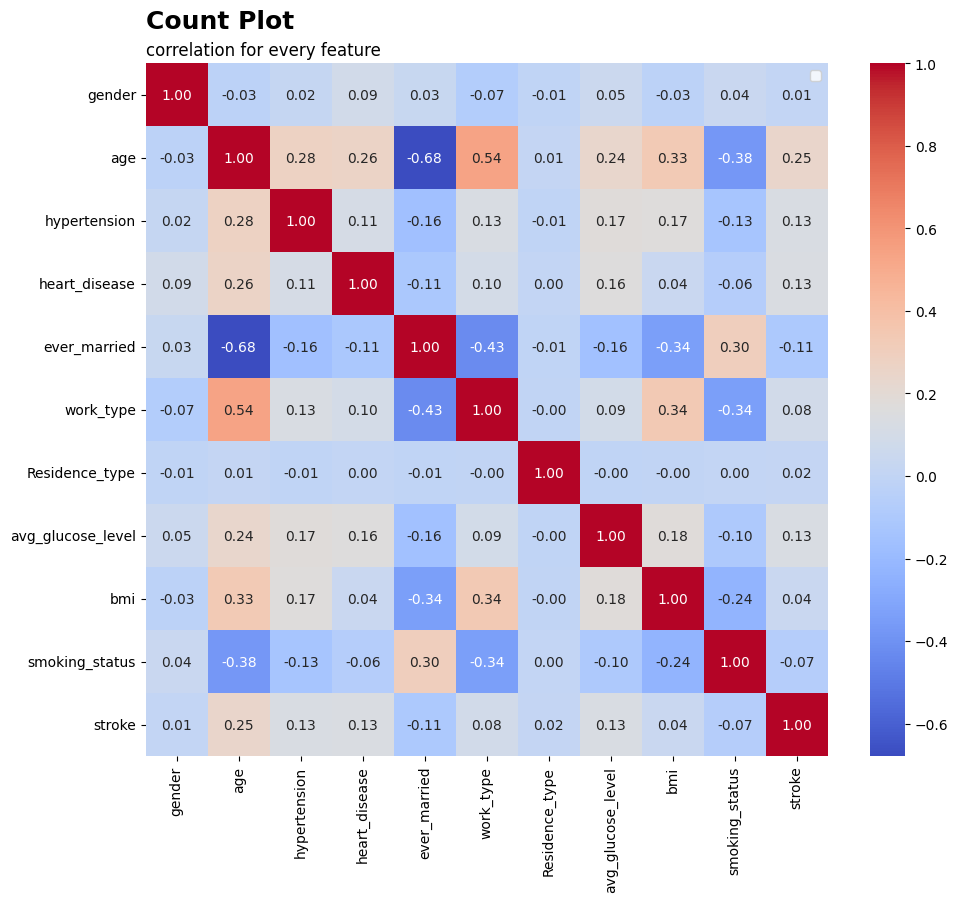

In [11]:
df = data
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')

ax.set_axisbelow(True)

plt.legend(['Pearson Correlation'])
plt.suptitle("Count Plot", ha='left', x=0.125, y=0.94, fontsize=18, fontweight='bold')
plt.title("correlation for every feature", loc='left')
plt.show()

In [12]:
data.groupby('ever_married').mean()[['bmi']]

,bmi
ever_married,
0,30.850749
1,25.216373


In [13]:
data['bmi'] = data.groupby('ever_married').transform(lambda x: x.fillna(x.mean()))['bmi']
data

<ipython-input-13-d0f9dbb58fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'] = data.groupby('ever_married').transform(lambda x: x.fillna(x.mean()))['bmi']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,3,1,228.69,36.600000,0,1
1,0,61.0,0,0,0,4,0,202.21,30.850749,1,1
2,1,80.0,0,1,0,3,0,105.92,32.500000,1,1
3,0,49.0,0,0,0,3,1,171.23,34.400000,2,1
4,0,79.0,1,0,0,4,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,0,3,1,83.75,30.850749,1,0
5106,0,81.0,0,0,0,4,1,125.20,40.000000,1,0
5107,0,35.0,0,0,0,4,0,82.99,30.600000,1,0
5108,1,51.0,0,0,0,3,0,166.29,25.600000,0,0


In [14]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

In [15]:
transformer_num = make_pipeline(MinMaxScaler())
transformer_cat = make_pipeline(OneHotEncoder())

preprocessor = make_column_transformer(
    (transformer_num, feature_num),
    (transformer_cat, feature_cat),
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8)
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[-1]]

In [16]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [19]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),

    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(units=128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(units=1, activation='sigmoid'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)


In [21]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping]

)

Epoch 1/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - binary_accuracy: 0.6688 - loss: 0.7167 - val_binary_accuracy: 0.5431 - val_loss: 0.7631
Epoch 2/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.7622 - loss: 0.5161 - val_binary_accuracy: 0.6977 - val_loss: 0.5727
Epoch 3/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7934 - loss: 0.4639 - val_binary_accuracy: 0.7182 - val_loss: 0.5170
Epoch 4/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8005 - loss: 0.4395 - val_binary_accuracy: 0.7436 - val_loss: 0.4842
Epoch 5/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8111 - loss: 0.4194 - val_binary_accuracy: 0.7172 - val_loss: 0.5106
Epoch 6/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8236 - loss: 0.3963 - val_binary_accuracy: 0.7417 - val_loss: 0.4817
Epoch 7/200
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8271 - loss: 0.3900 - val_binary_accuracy: 0.7485 - val_loss: 0.4577

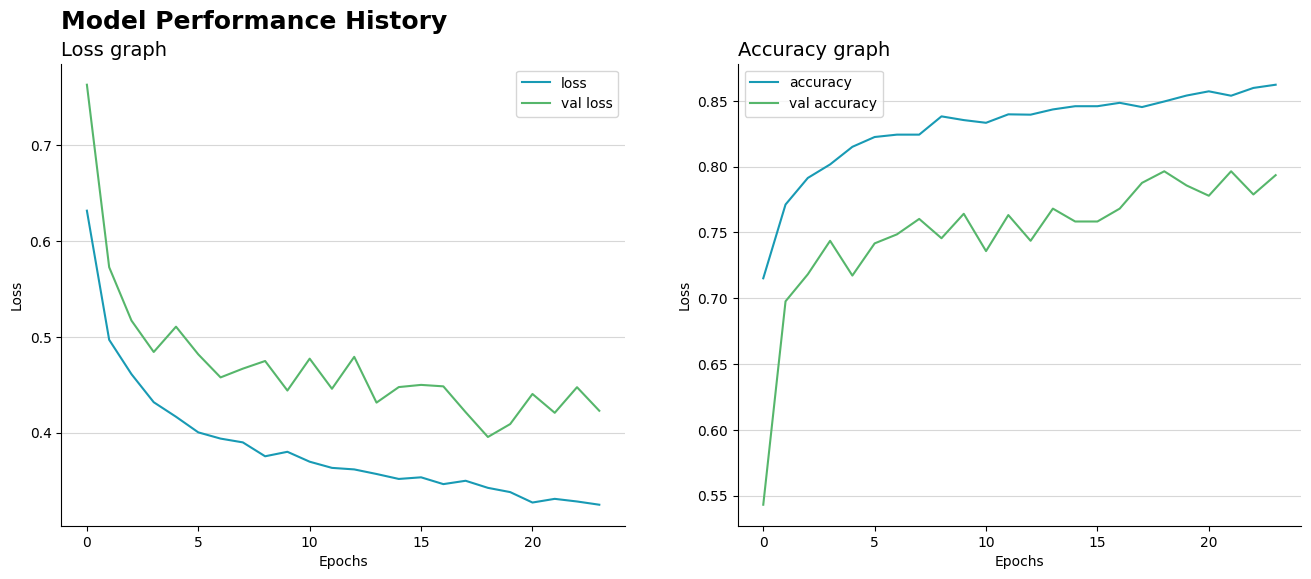

In [22]:
fig, ax = plt.subplots(1, 2,figsize=(16,6))

ax[0].plot(history.history['loss'], color=colors[2])
ax[0].plot(history.history['val_loss'], color=colors[5])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_axisbelow(True)
ax[0].legend(["loss", "val loss"])
ax[0].grid(axis='y', alpha=0.5)
ax[0].set_title("Loss graph", loc='left', fontsize=14)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epochs")

ax[1].plot(history.history['binary_accuracy'], color=colors[2])
ax[1].plot(history.history['val_binary_accuracy'], color=colors[5])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_axisbelow(True)
ax[1].legend(["accuracy", "val accuracy"])
ax[1].set_title("Accuracy graph", loc='left', fontsize=14)
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")



plt.grid(axis='y', alpha=0.5)
plt.suptitle("Model Performance History", ha='left', x=0.125, y=0.97, fontsize=18, fontweight='bold')
plt.show()

In [23]:
y_pred = model.predict(X_valid)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [24]:
print(classification_report(y_pred, y_valid.to_numpy()))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       822
           1       0.42      0.10      0.17       200

    accuracy                           0.80      1022
   macro avg       0.62      0.53      0.53      1022
weighted avg       0.74      0.80      0.74      1022

